# Regression with MLP in Keras using RVE engineering coefficients

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data set
is generated based on FE simulation (["E11", "E22", "E33", 
                       "nu12", "nu21", "nu13", "nu31", "nu23", "nu32", 
                        "G12", "G23", "G13","phiF"]) \
                        and Ghane_2020 analytical 
                         model for woven RVEs(["Ex", "Ey", "Gxy", "nu_xy"])

In [2]:
df = pd.read_excel("ElasEngCoefDataSet.xlsx",
                  sheet_name='400without_header',  
                 header=None,
                 names=[ "EM", "nuM", "EF", "nuF", 
                        "E11", "E22", "E33", 
                         "nu12", "nu21", "nu13", "nu31", "nu23", "nu32", 
                         "G12", "G23", "G13","phiF",
                        "Ex", "Ey", "Gxy", "nu_xy"])
# the re is another sheet in the excel file that contains the headers, 
# but the pd.read_excel has problem opening it properally. Even after droping the first two rows(indeces)
#df=df.drop(labels=['props','index'], axis=0)

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EM,400.0,6742.033691,1876.179494,3525.390625,5121.826172,6743.652344,8365.478516,9987.304688
nuM,400.0,0.370137,0.069138,0.250937,0.310703,0.369766,0.429648,0.489531
EF,400.0,429108.151855,206642.417684,71801.171875,250375.878906,428950.585938,605774.560547,784699.414062
nuF,400.0,0.300081,0.057675,0.200391,0.250293,0.300195,0.350098,0.399219
E11,400.0,192754.196650,100335.067168,4896.330000,107683.350000,185773.350000,267250.025000,451566.700000
E22,400.0,23945.284150,11953.328991,4896.330000,15594.417500,21512.670000,28961.335000,84310.000000
E33,400.0,23817.740085,12165.215575,4896.330000,15297.165000,21110.500000,28917.752500,86616.670000
nu12,400.0,0.335012,0.047248,0.224490,0.301407,0.333817,0.368867,0.450100
nu21,400.0,0.056486,0.046137,0.008838,0.025987,0.040918,0.070121,0.438000
nu13,400.0,0.336019,0.048014,0.226610,0.303152,0.335417,0.369733,0.455300


In [4]:
Features = df[['phiF','EM','nuM','EF','nuF']]
#.to_numpy(np.float32)any
Output = df[['E11','E22','nu12','nu13','nu23','G12','G13','G23']]

In [5]:
Features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phiF,400.0,0.450242,0.086614,0.301172,0.375879,0.450586,0.525293,0.599414
EM,400.0,6742.033691,1876.179494,3525.390625,5121.826172,6743.652344,8365.478516,9987.304688
nuM,400.0,0.370137,0.069138,0.250937,0.310703,0.369766,0.429648,0.489531
EF,400.0,429108.151855,206642.417684,71801.171875,250375.878906,428950.585938,605774.560547,784699.414062
nuF,400.0,0.300081,0.057675,0.200391,0.250293,0.300195,0.350098,0.399219


In [6]:
Output.describe().transpose()
#G13 is found equal to G12
#E33 is also found almost equal to E22

,count,mean,std,min,25%,50%,75%,max
E11,400.0,192754.196650,100335.067168,4896.330000,107683.350000,185773.350000,267250.025000,451566.700000
E22,400.0,23945.284150,11953.328991,4896.330000,15594.417500,21512.670000,28961.335000,84310.000000
nu12,400.0,0.335012,0.047248,0.224490,0.301407,0.333817,0.368867,0.450100
nu13,400.0,0.336019,0.048014,0.226610,0.303152,0.335417,0.369733,0.455300
nu23,400.0,0.467643,0.131219,0.254083,0.355267,0.440433,0.563717,0.808267
G12,400.0,7369.050025,2735.150787,1702.530000,5297.416750,6977.333500,9053.750250,16570.000000
G13,400.0,7273.009342,2788.829631,1702.530000,5172.749750,6824.333000,8912.583250,16821.670000
G23,400.0,8140.404727,3900.045132,1702.530000,5348.749750,7334.833500,10097.752500,26671.330000


# preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(Features, Output, random_state=42)

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
#X_train = scaler2.fit_transform(X_train)
X_train = scaler1.fit_transform(X_train)
#X_test = scaler2.transform(X_test)
X_test = scaler1.transform(X_test)
#new data set has been generated based on the sobol sequene technique using the function "Design_of_experiments"
# SobolDistributedData.xlsx contains the whole design space (before or after extension)
# new output based on the prediction of ANN will be written on a new xlse file called :
# 'ExtensionOutput.xlsx', sheet_name='Extension'
#extended_inp = pd.read_excel('SobolDistributedData.xlsx',
#                             sheet_name='Extension',
#                             index_col=0,
#                            )
#
#x_new=extended_inp.to_numpy()
#x_new = scaler1.transform(x_new)
#______________________________________
#____the number of input features for scaler function will change from 5 to 4 after appplying into y_train
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)


In [8]:
# description of input and output in Dataframe format: 
yy_test=pd.DataFrame(y_test,columns = ['E11','E22','nu12','nu13','nu23','G12','G13','G23'])
yy_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E11,100.0,0.432009,0.221199,0.073702,0.254909,0.412050,0.595694,0.977313
E22,100.0,0.242972,0.138551,0.053626,0.143595,0.221127,0.309921,0.785931
nu12,100.0,0.501488,0.233980,0.032327,0.343605,0.513910,0.667716,0.953755
nu13,100.0,0.489200,0.232935,0.025026,0.335673,0.506319,0.640780,0.936013
nu23,100.0,0.418279,0.243012,0.068972,0.229286,0.384951,0.577035,0.985444
G12,100.0,0.381954,0.187962,0.063042,0.235008,0.364776,0.506865,0.883795
G13,100.0,0.368447,0.186910,0.060222,0.220039,0.346733,0.491638,0.914281
G23,100.0,0.255519,0.144856,0.051826,0.144085,0.231147,0.333492,0.764400


#Check validity of inputs (no NaNs or sometimes 0s).
df.isnull().any()

# Neural network model implementation

In [9]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(8)
]) #Set the finer layer neuron number based on the number of desired outputs
#############################################################################
            #after the model is created compile() is called to specify the loss function and optimizer 
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.Adam(lr=1e-5),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
            # or optimizer = 'sgd'
            # "sgd" means the simple Stochastic Gradient Descent
            # The learning rate "lr" can be set after the default value = 0.01
##############################################################################
history = model.fit(X_train, y_train, epochs=2000, validation_split=0.1)
            # Keras will measure the loss and the extra metrics on validation set at the end of each EPOCH
            # if performance is better on validation set than the training set >> overfitting problem or data mismatch
            # And that's it! the neural network is trained
##############################################################################
            # Once you're satisfied with your model's validation accuracy, 
            # it's time to evaluate the model on test set
mse_test = model.evaluate(X_test, y_test)
    
            # make prediction on the first three instance of the test set, since we had not any other data:

y_absolute = y_test [:3]
y_pred = model.predict(X_test[:3])

Epoch 1/2000
9/9 [==============================] - 0s 36ms/step - loss: 0.1971 - root_mean_squared_error: 0.4440 - val_loss: 0.1878 - val_root_mean_squared_error: 0.4333
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1955 - root_mean_squared_error: 0.4422 - val_loss: 0.1863 - val_root_mean_squared_error: 0.4316
Epoch 3/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1940 - root_mean_squared_error: 0.4405 - val_loss: 0.1848 - val_root_mean_squared_error: 0.4298
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1925 - root_mean_squared_error: 0.4387 - val_loss: 0.1833 - val_root_mean_squared_error: 0.4281
Epoch 5/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1910 - root_mean_squared_error: 0.4370 - val_loss: 0.1818 - val_root_mean_squared_error: 0.4264
Epoch 6/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1895 - root_mean_squared_error: 0.4353 - val_loss: 0.1804 - val_root_mean_s

Epoch 49/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1372 - root_mean_squared_error: 0.3704 - val_loss: 0.1263 - val_root_mean_squared_error: 0.3554
Epoch 50/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1359 - root_mean_squared_error: 0.3687 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3535
Epoch 51/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1346 - root_mean_squared_error: 0.3669 - val_loss: 0.1236 - val_root_mean_squared_error: 0.3516
Epoch 52/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1333 - root_mean_squared_error: 0.3651 - val_loss: 0.1223 - val_root_mean_squared_error: 0.3497
Epoch 53/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1320 - root_mean_squared_error: 0.3633 - val_loss: 0.1209 - val_root_mean_squared_error: 0.3477
Epoch 54/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1307 - root_mean_squared_error: 0.3615 - val_loss: 0.1195 - val_root_m

Epoch 97/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0739 - root_mean_squared_error: 0.2718 - val_loss: 0.0633 - val_root_mean_squared_error: 0.2516
Epoch 98/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0728 - root_mean_squared_error: 0.2698 - val_loss: 0.0622 - val_root_mean_squared_error: 0.2494
Epoch 99/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0717 - root_mean_squared_error: 0.2677 - val_loss: 0.0612 - val_root_mean_squared_error: 0.2473
Epoch 100/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0706 - root_mean_squared_error: 0.2657 - val_loss: 0.0601 - val_root_mean_squared_error: 0.2452
Epoch 101/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0695 - root_mean_squared_error: 0.2637 - val_loss: 0.0591 - val_root_mean_squared_error: 0.2432
Epoch 102/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0685 - root_mean_squared_error: 0.2617 - val_loss: 0.0581 - val_roo

Epoch 145/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1708
Epoch 146/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0365 - root_mean_squared_error: 0.1910 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1697
Epoch 147/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0361 - root_mean_squared_error: 0.1899 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 148/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0357 - root_mean_squared_error: 0.1888 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676
Epoch 149/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0353 - root_mean_squared_error: 0.1878 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1666
Epoch 150/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0349 - root_mean_squared_error: 0.1867 - val_loss: 0.0274 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 193/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0243 - root_mean_squared_error: 0.1559 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1362
Epoch 194/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1357
Epoch 195/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0240 - root_mean_squared_error: 0.1549 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1353
Epoch 196/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0238 - root_mean_squared_error: 0.1544 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1349
Epoch 197/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0237 - root_mean_squared_error: 0.1539 - val_loss: 0.0181 - val_root_mean_squar

Epoch 240/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0187 - root_mean_squared_error: 0.1366 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1199
Epoch 241/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0186 - root_mean_squared_error: 0.1362 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1197
Epoch 242/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1194
Epoch 243/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0184 - root_mean_squared_error: 0.1355 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 244/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188
Epoch 245/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0141 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0146 - root_mean_squared_error: 0.1208 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1082
Epoch 288/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079
Epoch 289/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0144 - root_mean_squared_error: 0.1202 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1077
Epoch 290/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 291/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1072
Epoch 292/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192 - val_loss: 0.0114 - val_root_mean_squar

Epoch 335/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0114 - root_mean_squared_error: 0.1065 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0973
Epoch 336/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970
Epoch 337/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0112 - root_mean_squared_error: 0.1060 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0968
Epoch 338/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0966
Epoch 339/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 340/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0092 - val_

9/9 [==============================] - 0s 4ms/step - loss: 0.0086 - root_mean_squared_error: 0.0930 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 383/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0086 - root_mean_squared_error: 0.0927 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 384/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0086 - root_mean_squared_error: 0.0925 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0862
Epoch 385/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0085 - root_mean_squared_error: 0.0922 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0860
Epoch 386/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0085 - root_mean_squared_error: 0.0920 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 387/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0084 - root_mean_squared_error: 0.0918 - val_loss: 0.0073 - val_root_mean_squar

Epoch 430/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0068 - root_mean_squared_error: 0.0822 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0776
Epoch 431/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0774
Epoch 432/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0067 - root_mean_squared_error: 0.0818 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0772
Epoch 433/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0816 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0771
Epoch 434/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0066 - root_mean_squared_error: 0.0814 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0769
Epoch 435/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812 - val_loss: 0.0059 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0054 - root_mean_squared_error: 0.0738 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 478/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 479/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0735 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0701
Epoch 480/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0733 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 481/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 482/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0049 - val_root_mean_squar

Epoch 525/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0649
Epoch 526/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0045 - root_mean_squared_error: 0.0671 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0647
Epoch 527/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0045 - root_mean_squared_error: 0.0669 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 528/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 529/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0044 - root_mean_squared_error: 0.0667 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0644
Epoch 530/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0044 - root_mean_squared_error: 0.0666 - val_loss: 0.0041 - val_

9/9 [==============================] - 0s 4ms/step - loss: 0.0039 - root_mean_squared_error: 0.0622 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0606
Epoch 573/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 574/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0620 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0604
Epoch 575/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604
Epoch 576/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0038 - root_mean_squared_error: 0.0618 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 577/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0038 - root_mean_squared_error: 0.0617 - val_loss: 0.0036 - val_root_mean_squar

Epoch 620/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0576
Epoch 621/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0575
Epoch 622/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0581 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0575
Epoch 623/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0575
Epoch 624/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0575
Epoch 625/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.0033 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 668/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 669/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 670/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 671/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0549 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553
Epoch 672/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0031 - val_root_mean_squar

Epoch 715/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0540
Epoch 716/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 717/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0540
Epoch 718/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 719/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 720/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0029 - val_

9/9 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0529
Epoch 763/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 764/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 765/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0505 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 766/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0505 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 767/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 0.0028 - val_root_mean_squar

Epoch 810/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 811/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 812/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 813/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 814/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0488 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 815/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0488 - val_loss: 0.0027 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 858/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 859/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 860/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0516
Epoch 861/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 862/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0027 - val_root_mean_squar

Epoch 905/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 906/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 907/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 908/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 909/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0464 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0511
Epoch 910/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 0.0026 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0508
Epoch 953/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0509
Epoch 954/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0508
Epoch 955/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0507
Epoch 956/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0506
Epoch 957/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0026 - val_root_mean_squar

Epoch 1000/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 1001/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 1002/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 1003/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 1004/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 1005/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0025 

9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 1048/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 1049/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 1050/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 1051/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 1052/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0025 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0493
Epoch 1095/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494
Epoch 1096/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0493
Epoch 1097/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0430 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494
Epoch 1098/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0430 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0496
Epoch 1099/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0430 - val_loss: 0.0025 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494
Epoch 1142/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 1143/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 1144/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 1145/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 1146/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0024 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0487
Epoch 1189/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0488
Epoch 1190/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0487
Epoch 1191/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0487
Epoch 1192/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0488
Epoch 1193/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0024 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484
Epoch 1236/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0483
Epoch 1237/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0483
Epoch 1238/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484
Epoch 1239/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484
Epoch 1240/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0023 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0406 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0482
Epoch 1283/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0406 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1284/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1285/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 1286/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0482
Epoch 1287/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - val_loss: 0.0023 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477
Epoch 1330/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478
Epoch 1331/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0479
Epoch 1332/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478
Epoch 1333/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0479
Epoch 1334/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0023 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 1377/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0474
Epoch 1378/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0474
Epoch 1379/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0473
Epoch 1380/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0474
Epoch 1381/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0023 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 1424/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 1425/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 1426/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 1427/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 1428/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0022 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 1471/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 1472/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 1473/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 1474/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0467
Epoch 1475/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0022 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 1518/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 1519/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 1520/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 1521/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 1522/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0022 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 1565/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 1566/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 1567/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 1568/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0461
Epoch 1569/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0021 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 1612/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458
Epoch 1613/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 1614/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 1615/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 1616/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0021 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 1659/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 1660/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 1661/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 1662/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 1663/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0021 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 1706/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 1707/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 1708/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 1709/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0367 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0453
Epoch 1710/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0366 - val_loss: 0.0021 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 1753/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 1754/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 1755/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 1756/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 1757/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - val_loss: 0.0020 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 1800/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 1801/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 1802/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 1803/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 1804/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0020 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0356 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 1847/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0356 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 1848/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 1849/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 1850/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0445
Epoch 1851/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0020 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0446
Epoch 1894/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 1895/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 1896/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0351 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0446
Epoch 1897/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0351 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0446
Epoch 1898/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0351 - val_loss: 0.0020 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0442
Epoch 1941/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 1942/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0442
Epoch 1943/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 1944/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0445
Epoch 1945/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0020 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0439
Epoch 1988/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0439
Epoch 1989/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 1990/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 1991/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 1992/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0019 - val_root_mean_

In [11]:
model.save('Predictor')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Predictor\assets


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 124
mpl.rcParams['savefig.dpi'] = 124

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

In [13]:
loss_metrices = pd.DataFrame(history.history)

In [14]:
loss_metrices.keys()

Index(['loss', 'root_mean_squared_error', 'val_loss',
       'val_root_mean_squared_error'],
      dtype='object')

In [15]:
'''
plt.plot(loss_metrices['loss'])
plt.grid(True)
plt.title("Adam optimizer-3 hidden layer-64 neurons", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
#plt.legend(loc="lower right", fontsize=14)
'''

'\nplt.plot(loss_metrices[\'loss\'])\nplt.grid(True)\nplt.title("Adam optimizer-3 hidden layer-64 neurons", fontsize=14)\nplt.xlabel("Epoch", fontsize=14)\nplt.ylabel("Loss", fontsize=14)\n#plt.legend(loc="lower right", fontsize=14)\n'

In [16]:
loss_metrices['root_mean_squared_error']

0       0.443956
1       0.442208
2       0.440453
3       0.438712
4       0.437004
          ...   
1995    0.034417
1996    0.034406
1997    0.034407
1998    0.034385
1999    0.034390
Name: root_mean_squared_error, Length: 2000, dtype: float64

In [17]:
# how to count the number of hyperparameters or training parameters of the network
model.count_params()

13384

In [18]:
history.params

{'verbose': 1, 'epochs': 2000, 'steps': 9}

In [19]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [20]:
pd.DataFrame(history.history)
#pd.DataFrame(history.history).to_excel("output_case5.xlsx") 

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,0.197097,0.443956,0.187789,0.433346
1,0.195548,0.442208,0.186255,0.431573
2,0.193999,0.440453,0.184752,0.429828
3,0.192469,0.438712,0.183277,0.428108
4,0.190972,0.437004,0.181822,0.426406
...,...,...,...,...
1995,0.001185,0.034417,0.001936,0.044004
1996,0.001184,0.034406,0.001937,0.044012
1997,0.001184,0.034407,0.001939,0.044035
1998,0.001182,0.034385,0.001935,0.043989


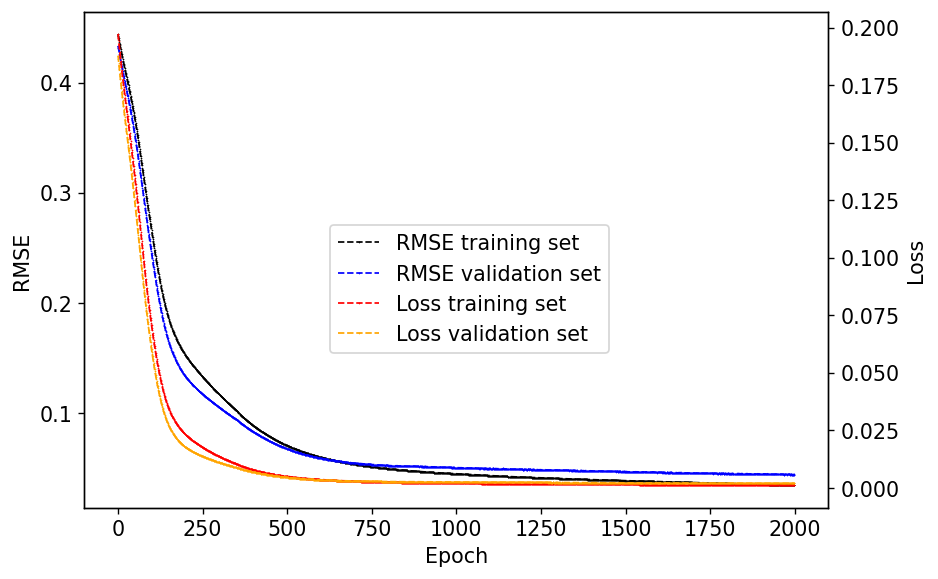

In [21]:
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))

ax2 = plt.twinx(ax)
ax2.plot(loss_metrices['loss'],label = 'Loss training set',color='red', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax2.plot(loss_metrices['val_loss'],label = 'Loss validation set',color='orange', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax2.set_ylabel('Loss')


ax.plot(loss_metrices['root_mean_squared_error'],label = 'RMSE training set',color='black', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax.plot(loss_metrices['val_root_mean_squared_error'],label = 'RMSE validation set',color='blue', marker='+', linestyle='dashed', linewidth=1, markersize=.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE')


fig.legend(loc='center')
#plt.plot(loss_metrices['root_mean_squared_error'])
plt.grid(False)

In [22]:
mse_test

[0.0011984083103016019, 0.03461803123354912]

# Model prediction on the test set

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred_tr = model.predict(X_train)

In [25]:
#counting the Mean sq. error on the test set: 
MSE_test=tf.keras.metrics.mean_squared_error(y_test, y_pred)
MSE_test = pd.DataFrame(MSE_test)

In [26]:
# Save y_test for monitoring as a pandas dataframe
y_test1=y_test
#type(y_test1)>>numpy.ndarray

In [27]:
#__check if there is any null element 
# y_test1.isnull().any()

In [28]:
y_test=pd.DataFrame(y_test,columns = ['E11','E22','nu12','nu13','nu23','G12','G13','G23'])
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E11,100.0,0.432009,0.221199,0.073702,0.254909,0.412050,0.595694,0.977313
E22,100.0,0.242972,0.138551,0.053626,0.143595,0.221127,0.309921,0.785931
nu12,100.0,0.501488,0.233980,0.032327,0.343605,0.513910,0.667716,0.953755
nu13,100.0,0.489200,0.232935,0.025026,0.335673,0.506319,0.640780,0.936013
nu23,100.0,0.418279,0.243012,0.068972,0.229286,0.384951,0.577035,0.985444
G12,100.0,0.381954,0.187962,0.063042,0.235008,0.364776,0.506865,0.883795
G13,100.0,0.368447,0.186910,0.060222,0.220039,0.346733,0.491638,0.914281
G23,100.0,0.255519,0.144856,0.051826,0.144085,0.231147,0.333492,0.764400


# residuals

Text(0, 0.5, 'Residual percentage[%]')

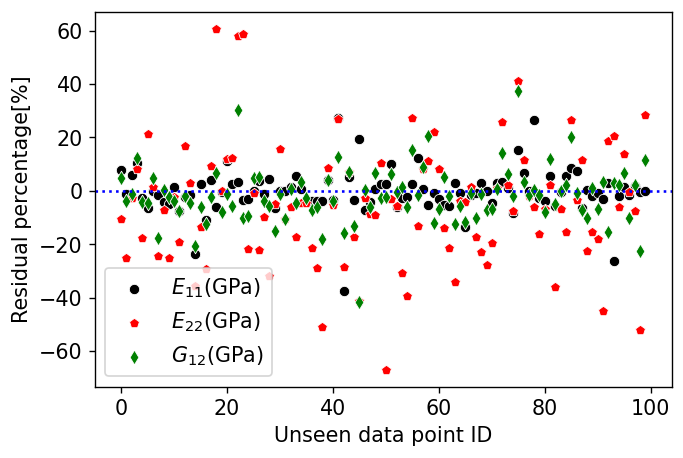

In [29]:
residualsE11 = 100*(y_test['E11']-y_pred[:,0])/y_test['E11']
residualsE22 = 100*(y_test['E22']-y_pred[:,1])/y_test['E22']
residualsG12 = 100*(y_test['G12']-y_pred[:,5])/y_test['G12']

sns.scatterplot(data = residualsE11,color='black', marker='o',label='$E_{11} (\mathrm{GPa})$')
sns.scatterplot(data = residualsE22,color='red', marker='p',label='$E_{22} (\mathrm{GPa})$')
sns.scatterplot(data = residualsG12,color='green', marker='d',label='$G_{12} (\mathrm{GPa})$')
plt.axhline(y=0, color='b', linestyle=':')
#plt.title('Residual of test data')
#Set x-axis label
plt.xlabel('Unseen data point ID')
plt.ylabel('Residual percentage[%]')

In [30]:
# Apply inverse scaleing
y_test1 = scaler1.inverse_transform(y_test1)
y_pred = scaler1.inverse_transform(y_pred)
y_train = scaler1.inverse_transform(y_train)
y_pred_tr = scaler1.inverse_transform(y_pred_tr)

# Plot the prediction scatering

<function matplotlib.pyplot.show(close=None, block=None)>

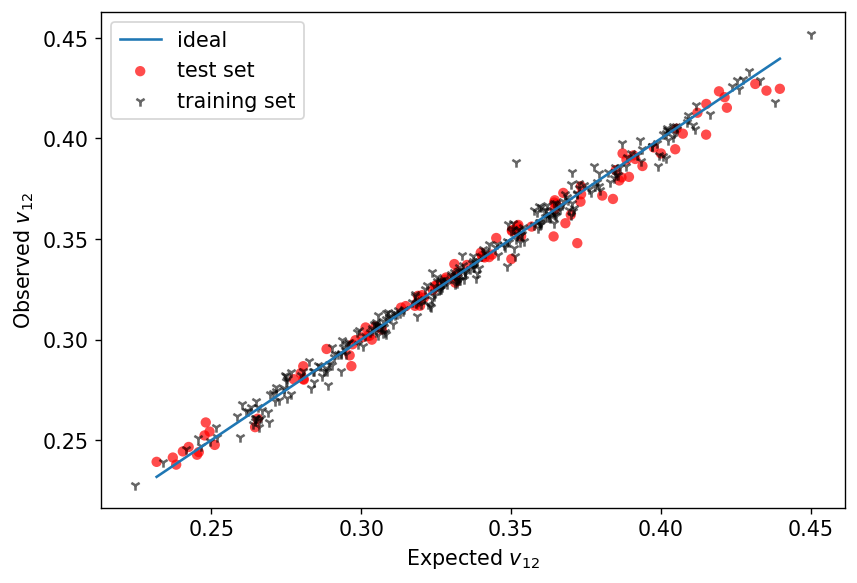

In [44]:
fig=plt.figure()

ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test1[:,2] , y_pred[:,2] , color='red', label = 'test set', alpha=.7 , edgecolors='none')
ax.scatter(y_train[:,2] , y_pred_tr[:,2] , color='black', label= 'training set',alpha=.6, marker='1')
x0 = np.array([y_test1[:,2].min(), y_test1[:,2].max()]) # instead of [0,1] as the plot border
y0 = x0
ax.plot(x0,y0, label='ideal')



#ax.scatter(y_test1[:,3] , y_pred[:,3], color='b')
ax.set_xlabel('Expected $v_{12}$')
ax.set_ylabel('Observed $v_{12}$')
#ax.set_title('predicted vs. test micromechanical UD Poissons ratio')
plt.legend()
plt.show

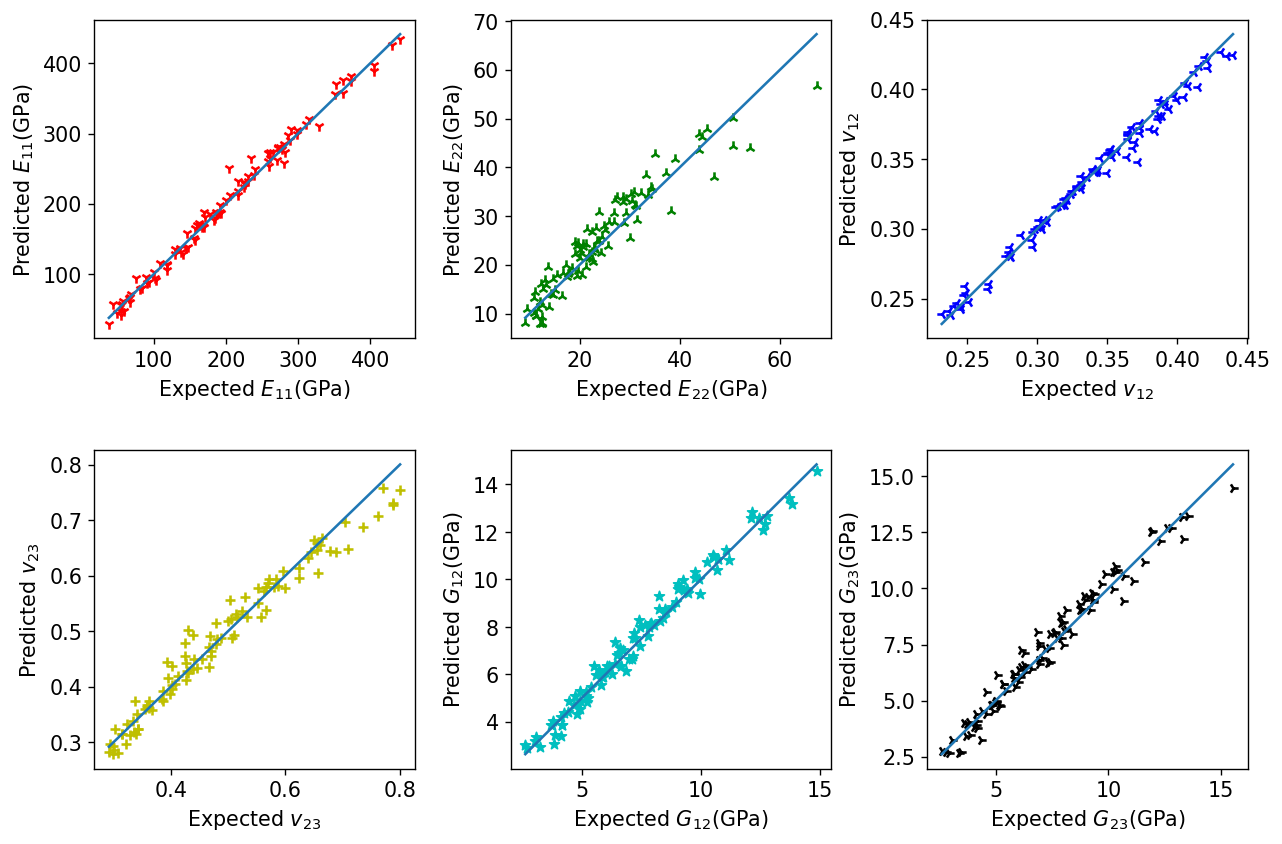

In [32]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
# ['E11','E22','nu12','nu13','nu23','G12','G13','G23'] 
# Parameters at the axes level



axes[0][0].scatter(y_test1[:,0]/1e3 , y_pred[:,0]/1e3 , color='r', marker='1')
x00 = 1e-3*np.array([y_test1[:,0].min(), y_test1[:,0].max()]) # instead of [0,1] as the plot border
y00 = x00
axes[0][0].plot(x00,y00)

axes[0][1].scatter(y_test1[:,1]/1e3 , y_pred[:,1]/1e3, color='g', marker='2')
x01= 1e-3*np.array([y_test1[:,1].min(), y_test1[:,1].max()])
y01=x01
axes[0][1].plot(x01,y01)

axes[0][2].scatter(y_test1[:,2] , y_pred[:,2], color='b', marker='3')
x02 = np.array([y_test1[:,2].min(),y_test1[:,2].max()])
y02 = x02
axes[0][2].plot(x02,y02)

axes[1][0].scatter(y_test1[:,4] , y_pred[:,4], color='y', marker='+')
x10 = np.array([y_test1[:,4].min(),y_test1[:,4].max()])
y10=x10
axes[1][0].plot(x10,y10)

axes[1][1].scatter(y_test1[:,5]/1e3 , y_pred[:,5]/1e3, color='c', marker='*')
x11 = 1e-3*np.array([y_test1[:,5].min(), y_test1[:,5].max()])
y11=x11
axes[1][1].plot(x11,y11)

axes[1][2].scatter(y_test1[:,6]/1e3 , y_pred[:,6]/1e3, color='black', marker='4')
x12 = 1e-3*np.array([y_test1[:,6].min(), y_test1[:,6].max()])
y12=x12
axes[1][2].plot(x12,y12)
#_______________________________________
# ['E11','E22','nu12','nu13','nu23','G12','G13','G23'] 

axes[0][0].set_ylabel('Predicted $E_{11} (\mathrm{GPa})$')
axes[0][1].set_ylabel('Predicted $E_{22} (\mathrm{GPa})$')
axes[0][2].set_ylabel('Predicted $v_{12}$')
axes[1][0].set_ylabel('Predicted $v_{23}$')
axes[1][1].set_ylabel('Predicted $G_{12} (\mathrm{GPa})$')
axes[1][2].set_ylabel('Predicted $G_{23} (\mathrm{GPa})$')

axes[0][0].set_xlabel('Expected $E_{11} (\mathrm{GPa})$')
axes[0][1].set_xlabel('Expected $E_{22} (\mathrm{GPa})$')
axes[0][2].set_xlabel('Expected $v_{12}$')
axes[1][0].set_xlabel('Expected $v_{23}$')
axes[1][1].set_xlabel('Expected $G_{12} (\mathrm{GPa})$')
axes[1][2].set_xlabel('Expected $G_{23} (\mathrm{GPa})$')

# Use left,right,top, bottom to stretch subplots
# Use wspace,hspace to add spacing between subplots
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.35,)

#______set_title('microscale UD 3D elastic properties. Predicted by ANN vs. FE simulations in Digimat')
# to use scientific number on bars : plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()


# Appling the microscale model on new data set

In [33]:
y_pred_ex = model.predict(x_test_ex)

NameError: name 'x_test_ex' is not defined

In [ ]:
x_test_ex.size

In [ ]:
y_test1_ex=y_test_ex
y_test_ex=pd.DataFrame(y_test_ex,columns = ['E11','E22','nu12','nu13','nu23','G12','G13','G23'])
y_test_ex.describe().transpose()

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
# ['E11','E22','nu12','nu13','nu23','G12','G13','G23'] 
# Parameters at the axes level

# Apply inverse scaleing
y_test1_ex = scaler1.inverse_transform(y_test1_ex)
y_pred_ex = scaler1.inverse_transform(y_pred)

axes[0][0].scatter(y_test1_ex[:,0] , y_pred_ex[:,0] , color='r', marker='1')
x00 = np.array([y_test1_ex[:,0].min(), y_test1_ex[:,0].max()]) # instead of [0,1] as the plot border
y00 = x00
axes[0][0].plot(x00,y00)

axes[0][1].scatter(y_test1_ex[:,1] , y_pred_ex[:,1], color='g', marker='2')
x01= np.array([y_test1_ex[:,1].min(), y_test1_ex[:,1].max()])
y01=x01
axes[0][1].plot(x01,y01)

axes[0][2].scatter(y_test1_ex[:,2] , y_pred_ex[:,2], color='b', marker='3')
x02 = np.array([y_test1_ex[:,2].min(),y_test1_ex[:,2].max()])
y02 = x02
axes[0][2].plot(x02,y02)

axes[1][0].scatter(y_test1_ex[:,4] , y_pred_ex[:,4], color='y', marker='+')
x10 = np.array([y_test1_ex[:,4].min(),y_test1_ex[:,4].max()])
y10=x10
axes[1][0].plot(x10,y10)

axes[1][1].scatter(y_test1_ex[:,5] , y_pred_ex[:,5], color='c', marker='*')
x11 = np.array([y_test1_ex[:,5].min(), y_test1_ex[:,5].max()])
y11=x11
axes[1][1].plot(x11,y11)

axes[1][2].scatter(y_test1_ex[:,6] , y_pred_ex[:,6], color='black', marker='4')
x12 = np.array([y_test1_ex[:,6].min(), y_test1_ex[:,6].max()])
y12=x12
axes[1][2].plot(x12,y12)
#_______________________________________
# ['E11','E22','nu12','nu13','nu23','G12','G13','G23'] 
axes[0][0].set_xlabel('Predicted E11')
axes[0][1].set_xlabel('Predicted E22')
axes[0][2].set_xlabel('Predicted nu12')
axes[1][0].set_xlabel('Predicted nu23')
axes[1][1].set_xlabel('Predicted G12')
axes[1][2].set_xlabel('Predicted G23')

axes[0][0].set_ylabel('Observed E11')
axes[0][1].set_ylabel('Observed E22')
axes[0][2].set_ylabel('Observed nu12')
axes[1][0].set_ylabel('Observed nu23')
axes[1][1].set_ylabel('Observed G12')
axes[1][2].set_ylabel('Observed G23')

# Use left,right,top, bottom to stretch subplots
# Use wspace,hspace to add spacing between subplots
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.35,)

#______set_title('microscale UD 3D elastic properties. Predicted by ANN vs. FE simulations in Digimat')
plt.show()

In [ ]:
#new data set has been generated based on the sobol sequene technique using the function "Design_of_experiments"
#__new data has already been exported and scaled: 
'''extended_inp = pd.read_excel('SobolDistributedData.xlsx',
                             sheet_name='Extension',
                             index_col=0)
extended_inp.describe().transpose()'''